# Number 3: Columns Joins 

You have two datasets:

* An Excel document of obesity rates, called `obesity.xlsx`
* A shapefile of US states from the [Census Burea](https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html), unzipped into `cb_2016_us_state_500k/`

You're going to make a choropleth of obesity rates in US states.

**MAKE SURE YOU HAVE COMPLETED PART TWO BEFORE YOU DO THIS ONE.**

## Part Zero: Import what you need

I'm not giving you any more hints!

In [36]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

## Part One: Opening your datasets

**Open up both files!** Think about what kind of file each one is before you try to open it.

In [37]:
state = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
state.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [38]:
obesity = pd.read_excel("obesity.xlsx")
obesity.head()

,statename,pct
0,Alabama,31.1
1,Alaska,27.7
2,Arizona,24.4
3,Arkansas,33.2
4,California,22.2


## Part Two: Map the states, just for fun

To double-check that the states look okay, make a quick map of them.

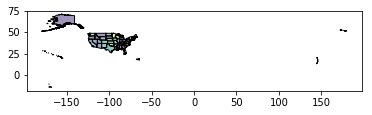

In [39]:
state.plot()

Uh, well, let's just stick to the continental Uninted States for now. An easy way to do this is by creating a **bounding box** and filtering out the ones that aren't inside.

I like to use [this dumb site](https://itouchmap.com/latlong.html) to find the latitude and longitude of specific points, but if I'm just trying to figure out a box I use [geojson.io](http://geojson.io/) and just... draw a box and see what it tells me.

For example, down below I am only selecting **the northeast**. I got the boundaries by drawing a box on geojson.io. We also use our good friend **`.within`** from last time to say hey states, which ones of you are inside of the boundary box?

In [40]:
from shapely.geometry import Polygon

bounds = [
            [
              -80.68359375,
              37.75334401310656
            ],
            [
              -65.91796875,
              37.75334401310656
            ],
            [
              -65.91796875,
              48.37084770238366
            ],
            [
              -80.68359375,
              48.37084770238366
            ],
            [
              -80.68359375,
              37.75334401310656
            ]
]

# Turn the coordinates into a shapely polygon
northeast_box = Polygon(bounds)

# Make sure our state CRS is in lat/lng by using to_crs
# You could also just have done
# states = states.to_crs({'init': 'epsg:4326'})
# and converted it permanently once instead of doing it multiple times later on
state.to_crs({'init': 'epsg:4326'}).within(northeast_box).head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9    False
dtype: bool

And of course we can take those `True` and `False` values and feed them back into `states` to only get the states we're interested in. I plot them below, but you could always save them to a variable instead!

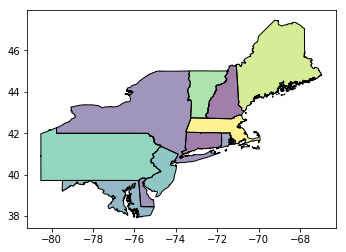

In [41]:
state[state.to_crs({'init': 'epsg:4326'}).within(northeast_box)].plot()

In [42]:
northeast_states = state[state.to_crs({'init': 'epsg:4326'}).within(northeast_box)]

In [43]:
state

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999..."
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000..."
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27..."


## Part Three: Filter your states

So *I* selected only states in the northeast. Now it's your job to use that new skill to **filter out any states that aren't in the continental USA.**

In [44]:
continental = state[state['NAME'] != 'Alaska']

In [45]:
continental = continental[continental['NAME'] != 'Hawaii']

In [46]:
continental = continental[continental['NAME'] != 'Puerto Rico']

In [47]:
continental = continental[continental['NAME'] != 'American Samoa']

In [48]:
continental = continental[continental['NAME'] != 'Guam']

In [49]:
continental = continental[continental['NAME'] != 'Commonwealth of the Northern Mariana Islands']

In [50]:
continental = continental[continental['NAME'] != 'United States Virgin Islands']

In [51]:
continental

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999..."
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000..."
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27..."
11,0400000US16,214042908012,2398669593,16,00,Idaho,16,01779783,ID,"POLYGON ((-117.242675 44.396548, -117.234835 4..."


In [28]:
#non_continental = [
            #[
              #-149.493673 ,
              #64.200841
            #],
            #[
              #-155.582782 ,
              #19.896766
            #],
            #[
              #-170.696181 ,
              #-14.301640
            #],
            #[
              #-66.590149 ,
              #18.220833
            #],
            #[
              #144.793731 ,
              #13.444304
            #],
            #[
              #145.673900 ,
              #15.097900
            #],
            #[
              #-64.896335 ,
               #18.335765 
            #]
#]

#noncont_box = Polygon(non_continental)
#state.to_crs({'init': 'epsg:4326'}).within(noncont_box).head(5)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [16]:
#continental = state[state.to_crs({'init': 'epsg:4326'}).disjoint(noncont_box)]

In [52]:
continental.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."


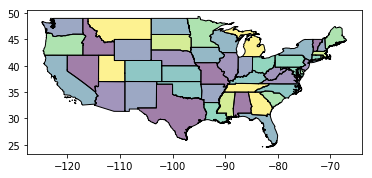

In [53]:
continental.plot()

## Part Four: Joining your data

You have some obesity data, it looks like this:

In [54]:
obesity.head()

,statename,pct
0,Alabama,31.1
1,Alaska,27.7
2,Arizona,24.4
3,Arkansas,33.2
4,California,22.2


You have some states, they look like this:

In [55]:
continental.head(3)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."


You need to **merge them together** using [merge](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html), which is just a normal pandas thing we've done before.

**THIS IS NOT A SPATIAL JOIN.** We're just saying hey, you guys both have columns that match, right? You might want to get together.

All `.merge` needs is two dataframes and a `left_on`/`right_on` to specify which columns to match up. Unlike a spatial join, for most column joins it doesn't matter which one is "left" and which one is "right."

In [56]:
type(obesity)

pandas.core.frame.DataFrame

In [57]:
obesity

,statename,pct
0,Alabama,31.1
1,Alaska,27.7
2,Arizona,24.4
3,Arkansas,33.2
4,California,22.2
5,Colorado,19.1
6,Connecticut,24.0
7,Delaware,29.4
8,District of Columbia,9.9
9,Florida,25.2


In [58]:
obesity['longitude'] = ''

In [59]:
obesity['latitude'] = ''

In [60]:
obesity.set_value(0, 'longitude', '-86.902298')
obesity.set_value(0, 'latitude', '32.318231')
obesity.set_value(2, 'longitude', '-111.093731')
obesity.set_value(2, 'latitude', '34.048928')
obesity.set_value(3, 'longitude', '-91.831833')
obesity.set_value(3, 'latitude', '35.201050')
obesity.set_value(4, 'longitude', '-119.417932')
obesity.set_value(4, 'latitude', '36.778261')
obesity.set_value(5, 'longitude', '-105.782067')
obesity.set_value(5, 'latitude', '39.550051')
obesity.set_value(6, 'longitude', '-73.087749')
obesity.set_value(6, 'latitude', '41.603221')
obesity.set_value(7, 'longitude', '-75.527670')
obesity.set_value(7, 'latitude', '38.910832')
obesity.set_value(8, 'longitude', '-77.036871')
obesity.set_value(8, 'latitude', '38.907192')
obesity.set_value(9, 'longitude', '-81.515754')
obesity.set_value(9, 'latitude', '27.664827')
obesity.set_value(10, 'longitude', '-82.900075')
obesity.set_value(10, 'latitude', '32.165622')
obesity.set_value(13, 'longitude', '-114.742041')
obesity.set_value(13, 'latitude', '44.068202')
obesity.set_value(14, 'longitude', '-89.398528')
obesity.set_value(14, 'latitude', '40.633125')
obesity.set_value(15, 'longitude', '-86.134902')
obesity.set_value(15, 'latitude', '40.267194')
obesity.set_value(16, 'longitude', '-93.097702')
obesity.set_value(16, 'latitude', '41.878003')
obesity.set_value(17, 'longitude', '-98.484246')
obesity.set_value(17, 'latitude', '39.011902')
obesity.set_value(18, 'longitude', '-84.270018')
obesity.set_value(18, 'latitude', '37.839333')
obesity.set_value(19, 'longitude', '-91.962333')
obesity.set_value(19, 'latitude', '30.984298')
obesity.set_value(20, 'longitude', '-69.445469')
obesity.set_value(20, 'latitude', '45.253783')
obesity.set_value(21, 'longitude', '-76.641271')
obesity.set_value(21, 'latitude', '39.045755')
obesity.set_value(22, 'longitude', '-71.382437')
obesity.set_value(22, 'latitude', '42.407211')
obesity.set_value(23, 'longitude', '-85.602364')
obesity.set_value(23, 'latitude', '44.314844')
obesity.set_value(24, 'longitude', '-94.685900')
obesity.set_value(24, 'latitude', '46.729553')
obesity.set_value(25, 'longitude', '-89.398528')
obesity.set_value(25, 'latitude', '32.354668')
obesity.set_value(26, 'longitude', '-91.831833')
obesity.set_value(26, 'latitude', '37.964253')
obesity.set_value(27, 'longitude', '-110.362566')
obesity.set_value(27, 'latitude', '46.879682')
obesity.set_value(28, 'longitude', '-99.901813')
obesity.set_value(28, 'latitude', '41.492537')
obesity.set_value(29, 'longitude', '-116.419389')
obesity.set_value(29, 'latitude', '38.802610')
obesity.set_value(30, 'longitude', '-71.572395')
obesity.set_value(30, 'latitude', '43.193852')
obesity.set_value(31, 'longitude', '-74.405661')
obesity.set_value(31, 'latitude', '40.058324')
obesity.set_value(32, 'longitude', '-105.870090')
obesity.set_value(32, 'latitude', '34.519940')
obesity.set_value(33, 'longitude', '-74.005941')
obesity.set_value(33, 'latitude', '40.712784')
obesity.set_value(34, 'longitude', '-79.019300')
obesity.set_value(34, 'latitude', '35.759573')
obesity.set_value(35, 'longitude', '-101.002012')
obesity.set_value(35, 'latitude', '47.551493')
obesity.set_value(36, 'longitude', '-82.907123')
obesity.set_value(36, 'latitude', '40.417287')
obesity.set_value(37, 'longitude', '-97.092877')
obesity.set_value(37, 'latitude', '35.007752')
obesity.set_value(38, 'longitude', '-120.554201')
obesity.set_value(38, 'latitude', '43.804133')
obesity.set_value(39, 'longitude', '-77.194525')
obesity.set_value(39, 'latitude', '41.203322')
obesity.set_value(41, 'longitude', '-71.477429')
obesity.set_value(41, 'latitude', '41.580095')
obesity.set_value(42, 'longitude', '-81.163725')
obesity.set_value(42, 'latitude', '33.836081')
obesity.set_value(43, 'longitude', '-99.901813')
obesity.set_value(43, 'latitude', '43.969515')
obesity.set_value(44, 'longitude', '-86.580447')
obesity.set_value(44, 'latitude', '35.517491')
obesity.set_value(45, 'longitude', '-99.901813')
obesity.set_value(45, 'latitude', '31.968599')
obesity.set_value(46, 'longitude', '-111.093731')
obesity.set_value(46, 'latitude', '39.320980')
obesity.set_value(47, 'longitude', '-72.577841')
obesity.set_value(47, 'latitude', '44.558803')
obesity.set_value(48, 'longitude', '-78.656894')
obesity.set_value(48, 'latitude', '37.431573')
obesity.set_value(49, 'longitude', '-120.740139')
obesity.set_value(49, 'latitude', '47.751074')
obesity.set_value(50, 'longitude', '-80.454903')
obesity.set_value(50, 'latitude', '38.597626')
obesity.set_value(51, 'longitude', '-88.787868')
obesity.set_value(51, 'latitude', '43.784440')
obesity.set_value(52, 'longitude', '-107.290284')
obesity.set_value(52, 'latitude', '43.075968')

,statename,pct,longitude,latitude
0,Alabama,31.1,-86.902298,32.318231
1,Alaska,27.7,,
2,Arizona,24.4,-111.093731,34.048928
3,Arkansas,33.2,-91.831833,35.201050
4,California,22.2,-119.417932,36.778261
5,Colorado,19.1,-105.782067,39.550051
6,Connecticut,24.0,-73.087749,41.603221
7,Delaware,29.4,-75.527670,38.910832
8,District of Columbia,9.9,-77.036871,38.907192
9,Florida,25.2,-81.515754,27.664827


In [61]:
obesity['longitude'] = obesity['longitude'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [62]:
obesity['latitude'] = obesity['latitude'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [63]:
obesity.dtypes

statename     object
pct          float64
longitude    float64
latitude     float64
dtype: object

In [64]:
#points = obesity.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
obesity

,statename,pct,longitude,latitude
0,Alabama,31.1,-86.902298,32.318231
1,Alaska,27.7,NaN,NaN
2,Arizona,24.4,-111.093731,34.048928
3,Arkansas,33.2,-91.831833,35.201050
4,California,22.2,-119.417932,36.778261
5,Colorado,19.1,-105.782067,39.550051
6,Connecticut,24.0,-73.087749,41.603221
7,Delaware,29.4,-75.527670,38.910832
8,District of Columbia,9.9,-77.036871,38.907192
9,Florida,25.2,-81.515754,27.664827


In [65]:
obesity.dropna(subset=['longitude'], inplace=True)

In [66]:
obesity

,statename,pct,longitude,latitude
0,Alabama,31.1,-86.902298,32.318231
2,Arizona,24.4,-111.093731,34.048928
3,Arkansas,33.2,-91.831833,35.201050
4,California,22.2,-119.417932,36.778261
5,Colorado,19.1,-105.782067,39.550051
6,Connecticut,24.0,-73.087749,41.603221
7,Delaware,29.4,-75.527670,38.910832
8,District of Columbia,9.9,-77.036871,38.907192
9,Florida,25.2,-81.515754,27.664827
10,Georgia,28.0,-82.900075,32.165622


In [67]:
type(obesity)

pandas.core.frame.DataFrame

In [68]:
df_merged = pd.merge(obesity, continental[['NAME','geometry']], left_on='statename', right_on='NAME', how='left')

In [69]:
type(df_merged)

pandas.core.frame.DataFrame

In [70]:
continental.crs = {'init' : 'epsg:5071'}

In [71]:
continental.crs

{'init': 'epsg:5071'}

## Part Five: Mapping your data

Map it. Familiar projection, nice large size, etc. Use a [nice color map](https://matplotlib.org/examples/color/colormaps_reference.html) that makes sense.

The one below is Mercator - you can see the grumpy top of the USA - see if you can make it something better! Maybe find the EPSG code for an Albers Equal Area that's good for the continental United States?

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

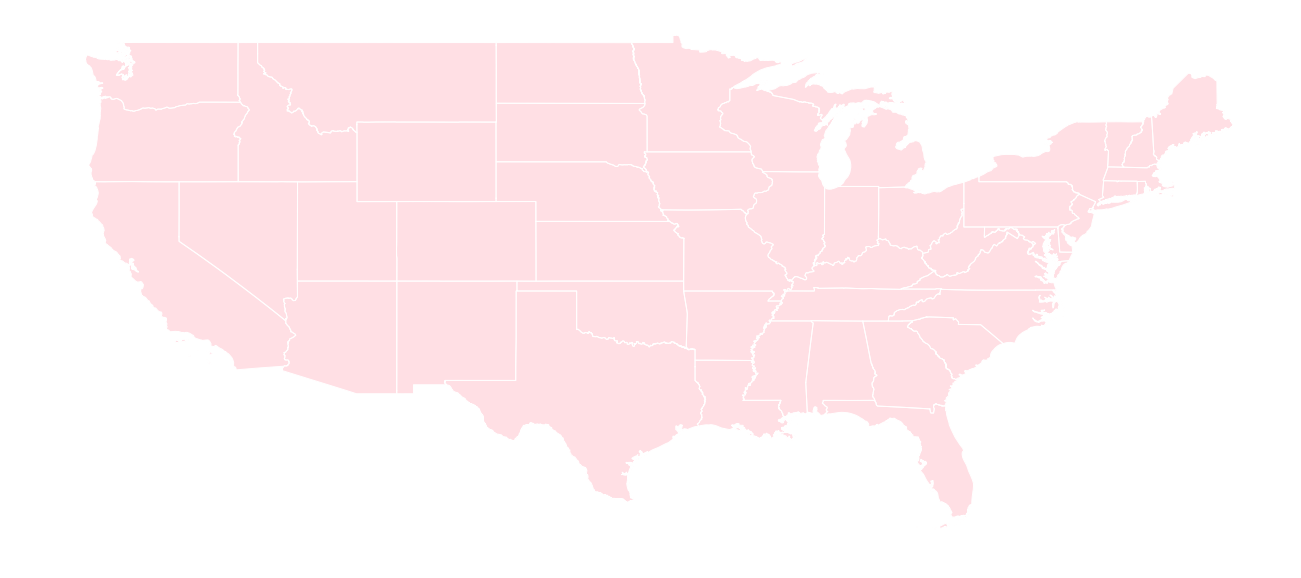

In [72]:
ax = continental.plot(figsize=(25,10), edgecolor='white', color='pink', legend=True, scheme='Quantiles')
ax.axis('off')

To get a different look, try passing `legend=True` and `scheme='Quantiles'`.

(-14210347.848541735,
 -7131041.5710879602,
 2624135.1346225599,
 6483295.4173965296)

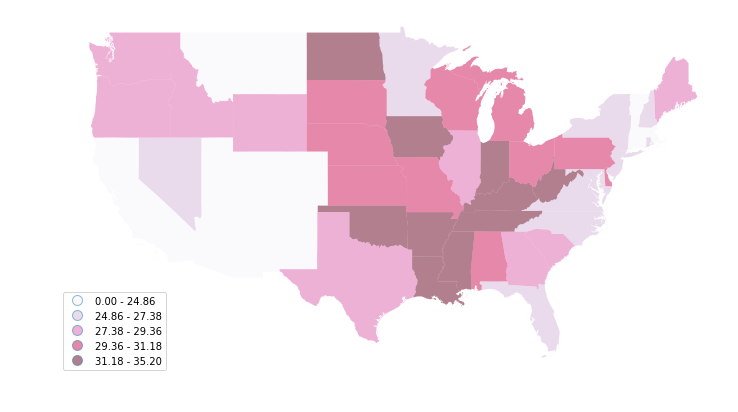

And oooone more time with `legend=True` and `scheme='equal_interval'`

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

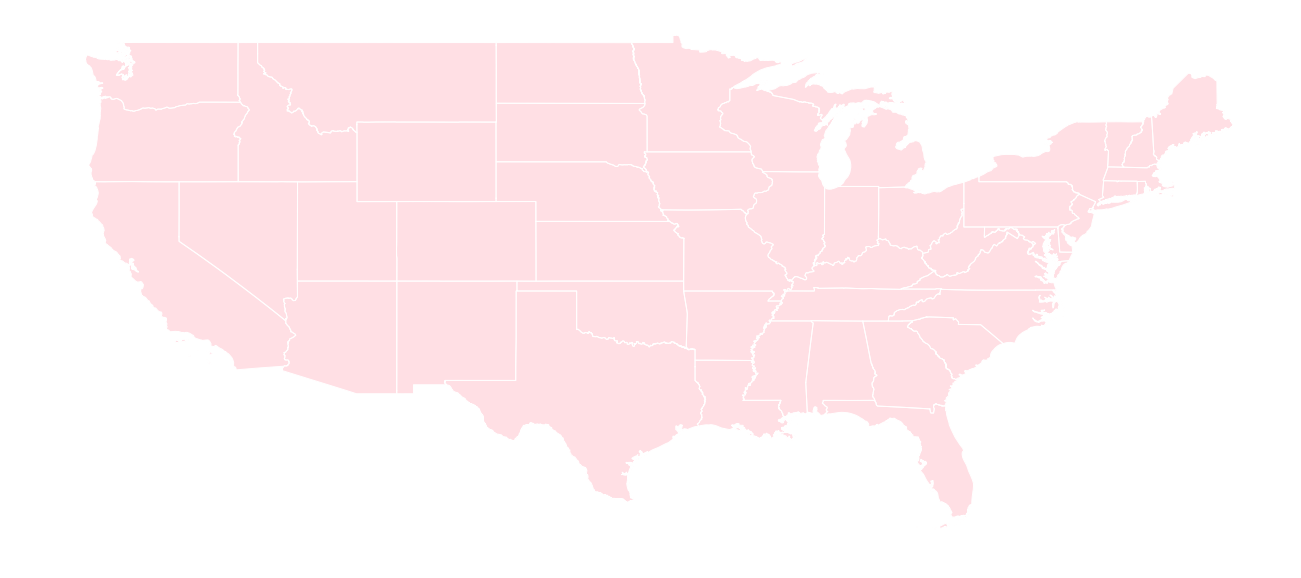

In [97]:
ax = continental.plot(figsize=(25,10), edgecolor='white', color='pink', legend=True, scheme='equal_interval')
ax.axis('off')

## Think about which one does the best job telling the story.

We'll talk about this next class.